In [2]:
import nltk
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
!pip install textblob

In [4]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
import pandas as pd
rawdf = pd.read_csv("apts2.csv",header=None)
rawdf.columns = ['Address', 'Neighborhood','Price','Apt Type','Bedrooms','Bathrooms','Rooms','Sqft','Description']

In [6]:
rawdf.dtypes

Address          object
Neighborhood     object
Price            object
Apt Type         object
Bedrooms        float64
Bathrooms       float64
Rooms           float64
Sqft             object
Description      object
dtype: object

In [7]:
rawdf[["Description"]].sample(10)

,Description
243,"The best of both worlds: At Devonshire House, ..."
46,"For immediate occupancy: Sprawling 3,173 squar..."
25,70 VESTRY-Once in a generation waterfront home...
805,"Timelessly renovated, 8D's sprawling layout in..."
1040,Embedded within one of the newest members of t...
1163,**PRICED TO SELL**\nVERSATILITY meets LUXURY i...
349,"Envisioned by renowned architect Sig Bergamin,..."
592,Who doesn't love hotel living?\nThis remarkabl...
1001,"Gracious in every way, apartment 2B at 720 For..."
122,A once in a lifetime opportunity to own a cust...


In [8]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
rawdf[["Description"]].sample(10)

,Description
21,"handsome and refined, this impeccably renovate..."
281,21 jay street is a spectacular landmark condom...
784,this duplex home exudes charm with its clever ...
1274,this is your perfect pied- a-terre or starter ...
956,upper east side medical office space on east 7...
730,welcome to this absolutely stunning mint condi...
1124,"this rarely available, spacious, corner 1 bed/..."
758,"east village dream apartment, this 2 bedroom, ..."
344,located in a sought-after tribeca loft buildin...
489,price reduction and immediate occupancy. lovel...


In [10]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: re.sub('\s+', ' ', x))

In [11]:
rawdf[["Description"]].head(10)

,Description
0,"one-of-a-kind, soho loft transformed into extr..."
1,enjoy dramatic 360-degree views of central par...
2,the penthouse at one hundred barclay offers an...
3,"enjoy panoramic central park, hudson river, ea..."
4,east harlem development opportunity. corner si...
5,"the stately 20 east end, designed by the world..."
6,"this exquisite 25 foot wide mansion, prominent..."
7,pass through the stately front doors and into ...
8,rarely do two contiguous buildings on an absol...
9,double height penthouse on the 88th floor of f...


In [12]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: re.sub('[^\w\s]','', x))

In [25]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
rawdf[["Neighborhood","Description"]].head(10)

,Neighborhood,Description
0,Soho/Nolita,oneofakind soho loft transformed extraordinary...
1,Midtown West,enjoy dramatic 360degree views central park hu...
2,Tribeca,penthouse one hundred barclay offers exclusive...
3,Midtown West,enjoy panoramic central park hudson river east...
4,East Harlem,east harlem development opportunity corner sit...
5,Upper East Side,stately 20 east end designed worldrenowned rob...
6,Upper East Side,exquisite 25 foot wide mansion prominently loc...
7,Sutton Area,pass stately front doors unparalleled grandeur...
8,Upper East Side,rarely two contiguous buildings absolutely gor...
9,Chelsea/Hudson Yards,double height penthouse 88th floor fifteen hud...


In [15]:
TextBlob(rawdf["Description"][10]).ngrams(2)

[WordList(['immediate', 'occupancy']),
 WordList(['occupancy', 'enjoy']),
 WordList(['enjoy', 'highest']),
 WordList(['highest', 'outdoor']),
 WordList(['outdoor', 'space']),
 WordList(['space', 'city']),
 WordList(['city', 'four']),
 WordList(['four', 'corner']),
 WordList(['corner', 'terraces']),
 WordList(['terraces', 'surround']),
 WordList(['surround', 'fullfloor']),
 WordList(['fullfloor', 'penthouse']),
 WordList(['penthouse', 'masterfully']),
 WordList(['masterfully', 'designed']),
 WordList(['designed', 'robert']),
 WordList(['robert', 'stern']),
 WordList(['stern', 'fullfloor']),
 WordList(['fullfloor', 'penthouse']),
 WordList(['penthouse', 'gracious']),
 WordList(['gracious', '4500']),
 WordList(['4500', 'square']),
 WordList(['square', 'foot']),
 WordList(['foot', 'three']),
 WordList(['three', 'bedroom']),
 WordList(['bedroom', '45']),
 WordList(['45', 'bathroom']),
 WordList(['bathroom', 'home']),
 WordList(['home', 'occupies']),
 WordList(['occupies', 'enviable']),
 Wor

In [21]:
stop.extend(['home','apartment','building','offer','well','unit','offer','throughout','new york','offers','one','two','residence','floor'])

In [26]:
wc = WordCloud(background_color="white", width=800, height=400,max_words=35)
wc.generate(''.join(rawdf["Description"]))

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

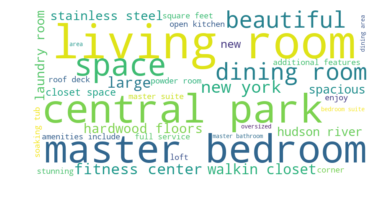

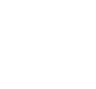

In [34]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(1, 1))
plt.axis("off")
plt.show()